C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


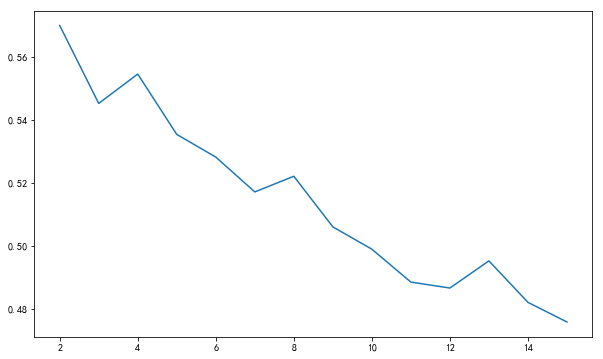

聚2类calinski_harabaz指数为：12917.952087
聚3类calinski_harabaz指数为：13605.678899
聚4类calinski_harabaz指数为：13235.959310
聚5类calinski_harabaz指数为：16269.352465
构建的K-Means模型为：
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)


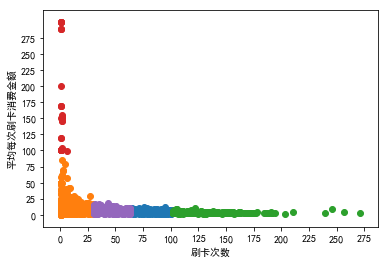

刷卡频次范围为： 64 101
平均每次刷卡消费金额范围为： 1.1428571428571428 11.92421052631579
1844
刷卡频次范围为： 1 30
平均每次刷卡消费金额范围为： 0.1 85.3
3000
刷卡频次范围为： 102 271
平均每次刷卡消费金额范围为： 1.4806201550387605 10.227622950819672
641
刷卡频次范围为： 1 6
平均每次刷卡消费金额范围为： 98.61666666666667 300.0
29
刷卡频次范围为： 31 63
平均每次刷卡消费金额范围为： 0.5363636363636365 17.548837209302327
2906


In [2]:
#task3-2
import numpy as np
import pandas as pd
data2=pd.read_csv(r'C:\Users\Administrator\Desktop\学生校园消费行为\任务1\task1_X2.csv',encoding='utf8')      #读取消费记录表
data = data2.loc[data2['Type'].isin(['消费'])]     #取出消费类型是消费的数据
#print(data)

g=[];h=[];s=pd.DataFrame()

data['Date']=pd.to_datetime(data['Date'])   ##将字符串时间转换为标准时间类型
dif=data['Date'].diff()  #对Date列做差分，即将Date列每两行数据做差
dif=dif.reset_index()     #将索引按从0 开始排列; 括号内没有drop=True，则原索引会保留为新一列，列名为index；dif=dif.reset_index(drop=True)表示删除原索引，并从0开始为索引赋值 
dif.drop([0],inplace=True)  #删除索引为0的整行;默认为inplace=False
#注意：此后的dif比Date列的行数少1
#print(dif)
cardno=data['CardNo'].diff()
cardno=cardno.reset_index()     #将索引按从0 开始排列
cardno.drop([0],inplace=True)  #删除索引为0的整行;默认为inplace=False
#注意：此后的cardno比CardNo列的行数少1
day=dif['Date'].astype('timedelta64[D]').astype(int)  # 提取做差后的数据以天数显示
hour=dif['Date'].astype('timedelta64[h]').astype(int)  # 提取做差后的数据以小时数显示
minute=dif['Date'].astype('timedelta64[m]').astype(int)  # 提取做差后的数据分钟数显示
#     print(dif)

m=pd.DataFrame()
m['index']=dif['index']
m['cardno']=cardno['CardNo'].apply(lambda x:x==0)
#     m['day']=day.apply(lambda x:x==0)
#     m['hour']=hour.apply(lambda x:x==0)
m['minute']=minute.apply(lambda x:-10<=x<=10)

#print(m)

t=len(data)
#print(t)   #j的行数
#print(m['hour'].iloc[4])   #hour列的第4行数据
m=m.reset_index()    #将索引按从0 开始排列; 同时原索引会保留为新一列，列名为index
#     print(minute)
y=[]
for i in range(len(m)):
    if  m['minute'].iloc[i]==True and m['cardno'].iloc[i]==True:
        t=t-1                     #计算就餐人次，即把属于同一次就餐刷卡（刷卡时间较接近）的多次刷卡记为一次
        y.append(m['index'].iloc[i])               #收集满足if条件的索引号
# print(y)
data.drop(y,inplace=True)#删除索引为y的整行;默认为inplace=False
#print(data)             #data为需删去索引后的数据（即删去重复的就餐人次后的数据）

h.append(y)
#print(h)
# print(data)      #data为剔除重复的就餐人次后的数据表
# print(t)


cc1= data[['CardNo','Money']].groupby(by = ['CardNo']).sum()            #各个学生的总消费金额
cc2= data[['CardNo','Money']].groupby(by = ['CardNo']).count()           #各个学生的总刷卡频次
cc3=cc1/cc2                                                   #各个学生的每次刷卡的平均金额
# print(cc3,cc1,cc2)
cc=pd.DataFrame()
cc['cardno']=cc1.index
cc['money']=cc1.values
cc['count']=cc2.values
cc['average']=cc3.values
# print(cc)      #cc为每个学生的校园卡号，总消费金额，总刷卡频次，平均每次刷卡的消费金额的表格

from sklearn.cluster import KMeans
X=cc.loc[:,['count','average']]    ##提取数据的特征
#print(X)
        # # 均值-方差标准化
        # from sklearn.preprocessing import StandardScaler   #导入均值-方差规范化模块
        # scaler = StandardScaler()
        # scaler.fit(X) 
        # XScale=scaler.transform(X)  

 #0-1标准化
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler().fit(X)## 训练规则
XScale = scale.transform(X) ## 应用规则
#print(XScale)
    # kmeans = KMeans(n_clusters = 3,
    #     random_state=123).fit(XScale) ##构建并训练模型
    # print('构建的K-Means模型为：\n',kmeans)
    # kmeans.labels_  #可查看具体的类别标签
    # print(kmeans.labels_[0:1000] )
#result = kmeans.predict([[1.5,1.5,1.5,1.5]])
#print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：', result[0])

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
silhouettteScore = []
for i in range(2,16):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=20).fit(XScale)
    
    #注：kmeans.labels_为构建的kmeans模型的类别标签
    score = silhouette_score(XScale,kmeans.labels_)  #silhouette_score评价法不需要输入标签真实值target，此处输入的是XScale
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,16),silhouettteScore,linewidth=1.5, linestyle="-")
plt.show()

from sklearn.metrics import calinski_harabaz_score
for i in range(2,6):
    ##构建并训练模型
    kmeans = KMeans(n_clusters = i,random_state=123).fit(XScale)
    score = calinski_harabaz_score(XScale,kmeans.labels_)
    print('聚%d类calinski_harabaz指数为：%f'%(i,score))

n_clusters =5
kmeans = KMeans(n_clusters =5,
    random_state=123).fit(XScale) ##构建并训练模型
print('构建的K-Means模型为：\n',kmeans)
kmeans.labels_  #可查看具体的类别标签
#print(kmeans.labels_[0:1000] )
ww=pd.DataFrame(XScale)
we=[]
for i in range(n_clusters):
    we.append(ww[kmeans.labels_ ==i].index )
        # ww0=ww[kmeans.labels_ == 0].index    #第0列的索引
        # ww1=ww[kmeans.labels_ ==1].index    #第1列的索引
        # ww2=ww[kmeans.labels_ == 2].index    #第2列的索引
        # we=[ww0,ww1,ww2]
#print(we)
#print(X.iloc[ww1,0])        #X中行索引为ww1,第0列的值
plt.rcParams['font.sans-serif']='SimHei'   # 显示中文
plt.rcParams['axes.unicode_minus']=False  # 显示负号
for i in range(n_clusters):
    plt.xticks(list(range(0,300,25)))## 规定x轴刻度
    plt.yticks(list(range(0,300,25)))## 确定y轴刻度
    plt.xlabel('刷卡次数')## 添加横轴标签
    plt.ylabel('平均每次刷卡消费金额')## 添加纵轴标签
    plt.scatter(X.iloc[we[i],0], X.iloc[we[i],1])
    
plt.show()

#打印出每一类的刷卡频次取值范围，平均每次刷卡消费金额范围
for i in range(n_clusters):
    print('刷卡频次范围为：',X.iloc[we[i],0].min(),X.iloc[we[i],0].max())
    print('平均每次刷卡消费金额范围为：',X.iloc[we[i],1].min(),X.iloc[we[i],1].max())
    print(len(we[i]))